<a id="top"></a>

<center><h1>Python <a href="http://pandas.pydata.org/pandas-docs/stable/">Pandas</a> Cheat Sheet</h1></center>

As a data analyst, these are common tasks I perform using Pandas

- [Pandas display output options](#options)
- [Quick summary statistics, # of rows, columns, etc](#quick_summary)
- [Sorting More Than One Column](#sorting)
- [Removing duplicates](#removing_duplicates)
- [Creating a column based on values from another column](#map)
- [Removing a column](#remove_column)
- [Replacing values in a series](#replacing_values)
- [Reading CSV or Excel files](http://pandas.pydata.org/pandas-docs/stable/io.html)
- [Renaming axis](#renaming_axis)
- [Renaming indexes or columns](#renaming_indexes_columns)
- [Binning data into intervals](#binning)
- [Grouping data](#group)
- [Sub-selecting or Slicing a Data Frame](#slicing)
- [Boolean indexing](#boolean)
- [Obtaining columns with partial column labels](#partial_column_labels)
- [Getting value counts](#value_counts)
- [Getting cumulative sum](#cum_sum)
- [Pivot table](#pivot_table)
- [Creating a new column based on a grouping using transform() method](#transform)
- [Pivot table Percent of Rows](#perc_rows)
- [Pivot table Percent of Columns](#perc_columns)
- [Transpose a data frame](#transpose)
- [Converting index to a column](#index2column)
- [Converting column to index](#column2index)
- [How to add or fill in missing dates](#missing_dates)
- [How to connect to an ODBC data source (Windows)](#database)
- [How to convert data in wide format to long format using melt()](#melt)
- [How to convert data in long format data to wide format using pivot()](#pivot)
- [Using category data type to control sort order](#category)
- [Merging 2 data frames using merge()](#merge)
- [Finding rows containing data with missing values](#missing)
- [Converting a data type of a column in a data frame](#convert_type)
- [Plotting data frames using MATPLOTLIB ver 1.5+](#matplotlib)
- [Plotting data frame directly and creating sub-plots](#subplots)
- [Creating a Bokeh chart from a Data Frame](#bokeh)
- [Making plotly charts directly from data frame](#plotly)
- [Method chaining](#chaining)
- [Sending Pandas data frame to R using rpy2 IPython notebook extension](#rpy2)
- [Python clone of R's dplyr](http://nbviewer.jupyter.org/github/pybokeh/jupyter_notebooks/blob/master/dplython/dplython_example.ipynb)
- [BONUS #1: A HUGE list of python and pandas snippets by Chris Albon](http://chrisalbon.com/)
- [BONUS #2: More goodies from a major pandas contributor, Tom Augspurger](http://tomaugspurger.github.io/)

<a id='options'></a>

### Setting display output [options](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.set_option.html)

[[back to top](#top)]

In [70]:
import pandas as pd
pd.set_option("display.max_rows",1000)    # or pd.options.display.max_rows=1000
pd.set_option("display.max_columns",20)   # or pd.options.display.max_columns=20 
pd.set_option('precision',7)
pd.set_option('large_repr', 'truncate')

<a id="quick_summary">

### Quick summary statistics using df.describe() and data types using df.info().  Also check out [pandas-summary](https://github.com/mouradmourafiq/pandas-summary) - an extension for data frame's describe() method.

[[back to top]](#top)

In [23]:
import pandas as pd
data = pd.DataFrame({'group': ['a', 'a', 'a', 'b','b', 'b', 'c', 'c','c'],
                 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,group,ounces
0,a,4.0
1,a,3.0
2,a,12.0
3,b,6.0
4,b,7.5
5,b,8.0
6,c,3.0
7,c,5.0
8,c,6.0


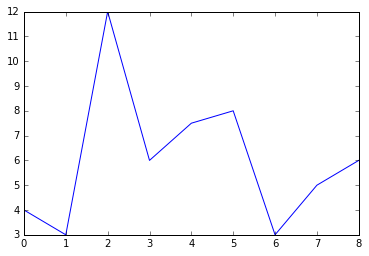

In [28]:
%matplotlib inline
data['ounces'].plot()

### df.info() shows data types, number of rows and columns, and memory usage of your data frame

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 8
Data columns (total 2 columns):
group     9 non-null object
ounces    9 non-null float64
dtypes: float64(1), object(1)
memory usage: 216.0+ bytes


<a id='sorting'></a>

### Sorting More Than One Column

[[back to top]](#top)

**Just pass a list of columns you want to sort and pass corresponding list of True/False to the ascending parameter**

In [30]:
data.sort_values(by=['group','ounces'], ascending=[False, True], inplace=True)
data

,group,ounces
6,c,3.0
7,c,5.0
8,c,6.0
3,b,6.0
4,b,7.5
5,b,8.0
1,a,3.0
0,a,4.0
2,a,12.0


<a id='removing_duplicates'></a>

### Removing duplicates

[[back to top](#top)]

In [31]:
import pandas as pd
data = pd.DataFrame({'k1': ['one'] * 3 + ['two'] * 4, 'k2': [3, 2, 1, 3, 3, 4, 4]})

In [32]:
data.sort_values(by='k2')
data

,k1,k2
0,one,3
1,one,2
2,one,1
3,two,3
4,two,3
5,two,4
6,two,4


In [21]:
data.drop_duplicates()  # by default, duplicate is defined by all columns

,k1,k2
0,one,3
1,one,2
2,one,1
3,two,3
5,two,4


### Define duplicates by column name(s):

In [33]:
data.drop_duplicates(subset='k1')  # duplicate in column k1 only

,k1,k2
0,one,3
3,two,3


<a id="map"></a>

### Creating a new column based on values from another column

[[back to top](#top)]

In [55]:
import pandas as pd
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon', 'Pastrami','corned beef', 'Bacon', 'pastrami', 'honey ham','nova lox'],
                 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


### Suppose you wanted to add a column indicating the type of animal that each food came from. Let’s write down a mapping of each distinct meat type to the kind of animal using a dictionary and a function:

In [56]:
meat_to_animal = {
'bacon': 'pig',
'pulled pork': 'pig',
'pastrami': 'cow',
'corned beef': 'cow',
'honey ham': 'pig',
'nova lox': 'salmon'
}

def meat2animal(series):
    if series["food"]=='bacon':
        return 'pig'
    elif series["food"]=='pulled pork':
        return 'pig'
    elif series["food"]=='pastrami':
        return 'cow'
    elif series["food"]=='corned beef':
        return 'cow'
    elif series["food"]=='honey ham':
        return 'pig'
    else:
        return 'salmon'

In [57]:
data['animal'] = data['food'].map(str.lower).map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


#### Or we could use apply() and apply the meat2animal() function to the new column:

In [58]:
# axis=1 means to apply the function for each row, but I prefer to use axis='columns' instead
data['animal2'] = data.apply(meat2animal,axis='columns')
data

,food,ounces,animal,animal2
0,bacon,4.0,pig,pig
1,pulled pork,3.0,pig,pig
2,bacon,12.0,pig,pig
3,Pastrami,6.0,cow,salmon
4,corned beef,7.5,cow,cow
5,Bacon,8.0,pig,salmon
6,pastrami,3.0,cow,cow
7,honey ham,5.0,pig,pig
8,nova lox,6.0,salmon,salmon


### We can also use [dataframe.assign()](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro-chained-assignment) function which was added in pandas version 0.16

In [59]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df
df = df.assign(ratio = df['data1'] / df['data2'])
df['mult'] = df['data1']*df['data2']
print ("royi")

royi


[[back to top](#top)]

<a id='remove_column'></a>

### Removing or dropping a column

[[back top top](#top)]

In [60]:
data.drop('animal2', axis='columns', inplace=True)  # dropping/removing a column
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


<a id="replacing_values"></a>

### Replacing Values in a Series

[[back to top](#top)]

In [61]:
import pandas as pd
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1
1    -999
2       2
3    -999
4   -1000
5       3
dtype: float64

In [63]:
data[data>1]=1000
data

0       1
1    -999
2    1000
3    -999
4   -1000
5    1000
dtype: float64

#### If you want to replace -999 with NaN:

In [32]:
data.replace(-999, np.nan, inplace=True)
data

0       1
1     NaN
2       2
3     NaN
4   -1000
5       3
dtype: float64

#### If you want to replace multiple values at once, you instead pass a list then the substitute value:

In [35]:
import pandas as pd
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1
1    -999
2       2
3    -999
4   -1000
5       3
dtype: float64

In [64]:
data.replace({1:0,2:67}, inplace=True)
data

0       0
1    -999
2    1000
3    -999
4   -1000
5    1000
dtype: float64

<a name="renaming_axis"></a>
<br>
<br>

### Renaming Axis Indexes

[[back to top](#top)]

In [67]:
import pandas as pd
data = pd.DataFrame(np.arange(12).reshape((3, 4)),index=['Ohio', 'Colorado', 'New York'],columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [48]:
data.index.map(str.upper)

array(['OHIO', 'COLORADO', 'NEW YORK'], dtype=object)

In [68]:
data.index = data.index.map(str.upper)
data

,one,two,three,four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


#### If you want to create a transformed version of a data set without modifying the original, a useful method is rename:

In [69]:
data.rename(index=str.title, columns=str.upper, inplace=True)  # str.title means to make the 1st letter capitalized only
data

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


<a id="renaming_indexes_columns"></a>

### Renaming Indexes or Columns

[[back to top](#top)]

#### <i>rename()</i> can be used in conjunction with a dict-like object providing new values for a subset of the axis labels:

In [70]:
import pandas as pd
data = pd.DataFrame(np.arange(12).reshape((3, 4)),index=['Ohio', 'Colorado', 'New York'],columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [71]:
data.rename(index={'Ohio': 'INDIANA'},columns={'three': 'peekaboo'},inplace=True)
data

,one,two,peekaboo,four
INDIANA,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


You can also apply str functions to modify the index or column labels

In [72]:
data.rename(index=str.title, columns=str.upper, inplace=True)  # str.title means to make the 1st letter capitalized only
data

,ONE,TWO,PEEKABOO,FOUR
Indiana,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


<a id="binning"></a>

### Binning Data Into Intervals

[[back to top](#top)]

In [73]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [76]:
len(ages)

12

#### Let’s divide these into bins of 18 to 25, 26 to 35, 35 to 60, and finally 60 and older. To do so, you have to use <i>cut()</i> function:

In [77]:
bins = [18, 25, 35, 60, 100]
len(bins)

5

In [80]:
cats = pd.cut(ages, bins)
cats


[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, object): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [82]:
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [78]:
cats.levels

Index(['(18, 25]', '(25, 35]', '(35, 60]', '(60, 100]'], dtype='object')

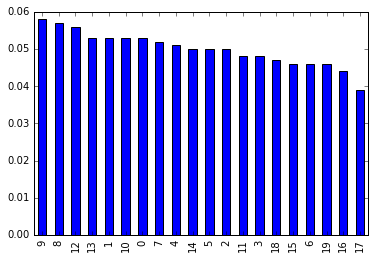

In [90]:
pd.value_counts(np.random.randint(0,20,1000),normalize=True).plot(kind='bar')

In [87]:
np.random.randint?

#### If you want the right value to be exclusive in the intervals:

In [80]:
pd.cut(ages, [18, 26, 36, 61, 100], right=False)

  [18, 26)
  [18, 26)
  [18, 26)
  [26, 36)
  [18, 26)
  [18, 26)
  [36, 61)
  [26, 36)
 [61, 100)
  [36, 61)
  [36, 61)
  [26, 36)
Levels (4): Index(['[18, 26)', '[26, 36)', '[36, 61)', '[61, 100)'], dtype=object)

#### You can also pass your own bin names by passing a list or array to the labels option:

In [83]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
pd.cut(ages, bins, labels=group_names)
pd.value_counts(pd.cut(ages, bins, labels=group_names))

Youth         5
YoungAdult    3
MiddleAged    3
Senior        1
dtype: int64

[[back to top](#top)]

<a id="group"></a>

## Grouping Data ( see also [value_count()](#value_counts) and [pivot_table()](#pivot_table) )

[[back to top](#top)]

In [91]:
import pandas as pd

df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

,data1,data2,key1,key2
0,0.640727,-0.202601,a,one
1,-0.217236,0.414524,a,two
2,0.178490,-1.628368,b,one
3,-0.344664,-0.063185,b,two
4,0.941001,0.851127,a,one


In [107]:
grouped = df.groupby(['key1','key2'])

data2= grouped.apply(lambda x:np.sin(x['data1'])+x['data2']).reset_index().rename(columns = {0:'bla'})
del data2['level_2']

<a id='slicing'></a>

## Sub-selecting or Slicing a Data Frame

[[back to top](#top)]

Filtering by label name: [[loc](#loc)]<br>
Filtering by index row and/or column: [[iloc](#iloc)]

<a id='df'></a>

In [109]:
import numpy as np
import pandas as pd

dates = pd.date_range('20130101',periods=6)
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.766714,0.918991,0.840716,-1.038417
2013-01-02,0.057742,-1.105662,-1.333045,0.230438
2013-01-03,-0.906221,0.287040,-0.458979,1.473831
2013-01-04,0.494660,1.177057,1.296697,-1.353105
2013-01-05,-0.467006,-0.206632,-1.113269,0.210478
2013-01-06,-0.228128,-0.210978,1.604234,-0.802342


### Getting first n rows of data frame using index slicing syntax

In [112]:
df.ix[:,0:3]  # get first 3 rows of the data frame

,A,B,C
2013-01-01,0.766714,0.918991,0.840716
2013-01-02,0.057742,-1.105662,-1.333045
2013-01-03,-0.906221,0.287040,-0.458979
2013-01-04,0.494660,1.177057,1.296697
2013-01-05,-0.467006,-0.206632,-1.113269
2013-01-06,-0.228128,-0.210978,1.604234


### Slicing based on data frame's index range

In [3]:
df['20130102':'20130104'] # get rows by index range

,A,B,C,D
2013-01-02,0.562039,-1.150613,0.265513,0.093981
2013-01-03,0.973170,0.877070,0.682884,-0.026271
2013-01-04,-1.146283,1.350325,-0.040049,1.069154


<a id='loc'></a>

### Slicing based on column labels/names using loc

[[view df](#slicing)]

In [4]:
df.loc[:,['A','B']]  # syntax is: df.loc[rows_index, cols_index]

,A,B
2013-01-01,1.495158,2.136794
2013-01-02,0.562039,-1.150613
2013-01-03,0.973170,0.877070
2013-01-04,-1.146283,1.350325
2013-01-05,0.919800,-0.058590
2013-01-06,1.286808,-0.357197


### Slicing based on row index label and column label combined using loc

In [5]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,0.562039,-1.150613
2013-01-03,0.973170,0.877070
2013-01-04,-1.146283,1.350325


<a id='iloc'></a>

### Slicing based on index position of the row or column using iloc

[[view df](#slicing)]

In [6]:
df.iloc[3]  # returns 4th row (index=3) of the data frame

A   -1.146283
B    1.350325
C   -0.040049
D    1.069154
Name: 2013-01-04 00:00:00, dtype: float64

In [7]:
df.iloc[3:5,0:2]  # returns specific range of rows and columns of the data frame

,A,B
2013-01-04,-1.146283,1.350325
2013-01-05,0.919800,-0.058590


In [9]:
df.iloc[[1,5],[0,2]] # returns specific rows and columns using lists containing columns or row indexes

,A,C
2013-01-02,0.562039,0.265513
2013-01-06,1.286808,-0.205763


In [10]:
df.iloc[1:3,:]  # returning specific rows and returning all columns

,A,B,C,D
2013-01-02,0.562039,-1.150613,0.265513,0.093981
2013-01-03,0.973170,0.877070,0.682884,-0.026271


In [11]:
df.iloc[:,1:3]  # returning all rows and specific columns

,B,C
2013-01-01,2.136794,0.034707
2013-01-02,-1.150613,0.265513
2013-01-03,0.877070,0.682884
2013-01-04,1.350325,-0.040049
2013-01-05,-0.058590,0.083294
2013-01-06,-0.357197,-0.205763


In [12]:
df.iloc[1,1]  # getting secific scalar/single value

-1.1506133975623973

<a id='boolean'></a>

## [Boolean Indexing](http://pandas.pydata.org/pandas-docs/stable/indexing.html#boolean-indexing)

[[view df](#df)]

The boolean operators are: **|** for or, <strong>&</strong> for and, and **~** for not. These **must** be grouped by using parentheses.

In [33]:
df[df.A > -0.5]  # or df[df["A"] > -0.5], this syntax works when there is a space in the column name

,A,B,C,D
2013-01-03,2.351035,0.085318,-2.265766,0.432268
2013-01-04,0.447390,0.205224,-0.614702,0.212125
2013-01-05,-0.455682,-2.765288,0.475253,0.432910
2013-01-06,1.000494,-0.462591,-0.638053,0.481087


or I've seen some people do boolean filtering by passing "criteria" variable to the data frame like so:

In [34]:
criteria = df.A > -0.5
df[criteria]

,A,B,C,D
2013-01-03,2.351035,0.085318,-2.265766,0.432268
2013-01-04,0.447390,0.205224,-0.614702,0.212125
2013-01-05,-0.455682,-2.765288,0.475253,0.432910
2013-01-06,1.000494,-0.462591,-0.638053,0.481087


In [113]:
df2 = df.copy()
df2['E']=['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,0.766714,0.918991,0.840716,-1.038417,one
2013-01-02,0.057742,-1.105662,-1.333045,0.230438,one
2013-01-03,-0.906221,0.287040,-0.458979,1.473831,two
2013-01-04,0.494660,1.177057,1.296697,-1.353105,three
2013-01-05,-0.467006,-0.206632,-1.113269,0.210478,four
2013-01-06,-0.228128,-0.210978,1.604234,-0.802342,three


In [36]:
df2[df2['E'].isin(['two','four'])]  # read as "return rows where column E contains two or four"

,A,B,C,D,E
2013-01-03,2.351035,0.085318,-2.265766,0.432268,two
2013-01-05,-0.455682,-2.765288,0.475253,0.432910,four


#### We can also do partial string matching.  So let's say you don't know the exact spelling a word is you want to match, you can do this:

In [3]:
df2[df2.E.str.contains("tw|ou")]

,A,B,C,D,E
2013-01-03,-1.409751,0.599982,1.359995,0.901001,two
2013-01-05,0.190956,-0.515755,-0.866012,-0.908422,four


#### Using ~ to do a "NOT"

In [38]:
df2[~df2['E'].isin(['two','four'])]  # column E containing values not in two or four

,A,B,C,D,E
2013-01-01,-0.564503,-1.195000,0.441140,-0.291384,one
2013-01-02,-0.893038,-0.372430,-0.436048,-0.545141,one
2013-01-04,0.447390,0.205224,-0.614702,0.212125,three
2013-01-06,1.000494,-0.462591,-0.638053,0.481087,three


AttributeError: 'FigureCanvasAgg' object has no attribute 'invalidate'

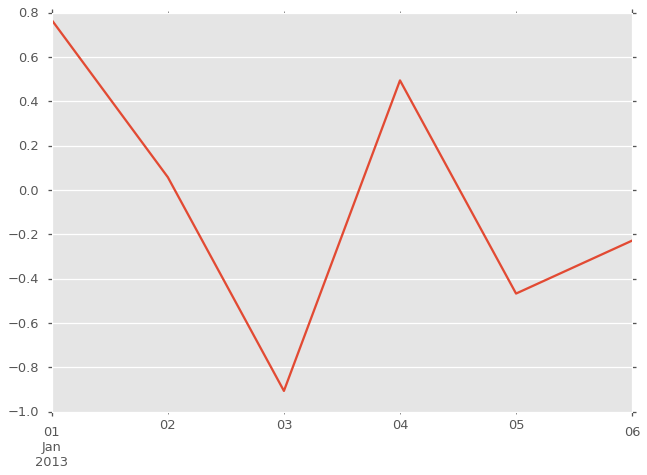

In [123]:
%matplotlib inline
plt.style.use('ggplot')
plt.style.use('seaborn-talk')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x106f0eb10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1077d9550>]], dtype=object)

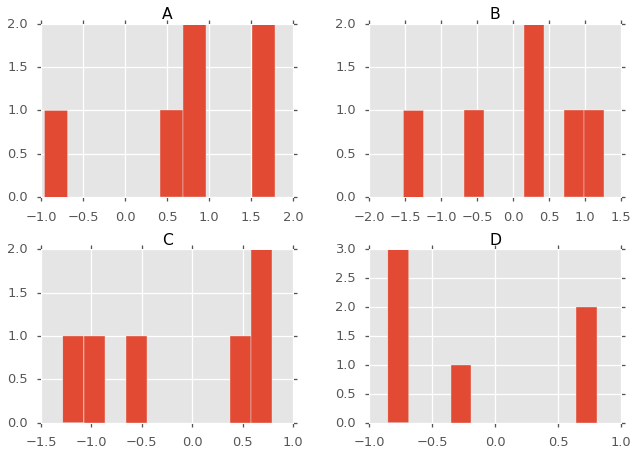

In [7]:
%matplotlib inline
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
plt.style.use('ggplot')
plt.style.use('seaborn-talk')
 
dates = pd.date_range('20130101',periods=6)
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df.hist()

#### Filtering using query() method

In [52]:
import numpy as np
import pandas as pd

dates = pd.date_range('20130101',periods=6)
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.683630,-0.961407,1.052018,0.512382
2013-01-02,-0.755844,1.672273,0.365384,1.030149
2013-01-03,-0.532466,0.616725,1.066731,-1.056756
2013-01-04,0.153878,-1.270198,0.346587,0.150570
2013-01-05,1.645820,0.817894,0.168950,-0.833291
2013-01-06,-0.768034,1.145290,-0.612168,0.325120


In [58]:
df.query('A > C')

,A,B,C,D
2013-01-05,1.64582,0.817894,0.16895,-0.833291


In [69]:
df.query('A > 0')

,A,B,C,D
2013-01-04,0.153878,-1.270198,0.346587,0.150570
2013-01-05,1.645820,0.817894,0.168950,-0.833291


In [68]:
df.query('A > 0 & A < 1')

,A,B,C,D
2013-01-04,0.153878,-1.270198,0.346587,0.15057


In [65]:
df.query('A > B | A > C')  # where A is greater than B or A is greater than C

,A,B,C,D
2013-01-01,-0.683630,-0.961407,1.052018,0.512382
2013-01-04,0.153878,-1.270198,0.346587,0.150570
2013-01-05,1.645820,0.817894,0.168950,-0.833291


<a id='partial_column_labels'></a>

## Obtaining columns with partial column labels

[[back to top](#top)]

In [40]:
import pandas as pd

df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

,data1,data2,key1,key2
0,0.740132,1.220225,a,one
1,1.223369,0.830145,a,two
2,-2.046775,-1.149754,b,one
3,-3.068403,0.675124,b,two
4,-0.467039,0.640412,a,one


In [42]:
df.filter(like='data')

,data1,data2
0,0.740132,1.220225
1,1.223369,0.830145
2,-2.046775,-1.149754
3,-3.068403,0.675124
4,-0.467039,0.640412


<a id='value_counts'></a>

## Getting Value Counts

It is so tempting to use the groupby() function or pivot_table, but most of the time, value_counts() function is all we need.

[[back to top](#top)]

In [1]:
import pandas as pd
data = pd.DataFrame({'group': ['a', 'a', 'a', 'b','b', 'b', 'c', 'c','c'],
                 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,group,ounces
0,a,4.0
1,a,3.0
2,a,12.0
3,b,6.0
4,b,7.5
5,b,8.0
6,c,3.0
7,c,5.0
8,c,6.0


In [3]:
data.group.value_counts()

a    3
b    3
c    3
Name: group, dtype: int64

<a id='cum_sum'></a>

## Getting Cumulative Sum

[[back to top](#top)]

In [3]:
data.group.value_counts().cumsum()

a    3
b    6
c    9
dtype: int64

<a id='pivot_table'></a>

## Pivot table example - see also this excellent [article](http://pbpython.com/pandas-pivot-table-explained.html) on pivot tables

[[back to top](#top)]

In [51]:
import pandas as pd
data = pd.DataFrame({'group': ['a', 'a', 'a', 'b','b', 'b', 'c', 'c','c'],
                 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,group,ounces
0,a,4.0
1,a,3.0
2,a,12.0
3,b,6.0
4,b,7.5
5,b,8.0
6,c,3.0
7,c,5.0
8,c,6.0


#### Calculating the means of each group

In [3]:
data.pivot_table(values='ounces',index='group',aggfunc=np.mean)

group
a        6.333333
b        7.166667
c        4.666667
Name: ounces, dtype: float64

#### Getting counts by group

In [5]:
data.pivot_table(values='ounces',index='group',aggfunc='count')

group
a        3
b        3
c        3
Name: ounces, dtype: int64

#### Getting cumulative sum or running total of the group counts

In [6]:
data.pivot_table(values='ounces',index='group',aggfunc='count').cumsum()

group
a        3
b        6
c        9
Name: ounces, dtype: int64

In [14]:
import pandas as pd

# sample data can be dowloaded here: http://pbpython.com/extras/sales-funnel.xlsx
df = pd.read_csv('/home/pybokeh/Downloads/sales-funnel.csv')

In [5]:
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


In [15]:
by_rep = pd.pivot_table(data=df, index='Rep', columns='Product', values='Quantity', aggfunc='count', fill_value=0)
by_rep

Product,CPU,Maintenance,Monitor,Software
Rep,,,,
Cedric Moss,2,1,0,1
Craig Booker,2,1,0,1
Daniel Hilton,2,0,0,1
John Smith,1,1,0,0
Wendy Yule,2,1,1,0


<a id="transform">

## Creating a new column based on a grouping using transform() method

[[back to top](#top)]

Let's get sample data from dplython library which is a clone of dplyr

In [6]:
from dplython import *

In [7]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Goal:** Create a column that contains the difference between a diamond's carat and the average of the carats for *that diamond's* color.<br><br>
Key take-away is to use the transform method of your specific column of the groupby object.

In [21]:
(diamonds.assign(carat_diff=diamonds
                 .groupby('color')['carat']
                 .transform(lambda x:x-x.mean())
                )
                .sort_values(by=['color','carat_diff'])
                .head(10)
)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,carat_diff
31597,31598,0.20,Ideal,D,VS2,61.5,57.0,367,3.81,3.77,2.33,-0.457795
31600,31601,0.20,Premium,D,VS2,62.3,60.0,367,3.73,3.68,2.31,-0.457795
31601,31602,0.20,Premium,D,VS2,61.7,60.0,367,3.77,3.72,2.31,-0.457795
38276,38277,0.21,Premium,D,VS2,61.6,59.0,386,3.82,3.78,2.34,-0.447795
38277,38278,0.21,Premium,D,VS2,60.6,60.0,386,3.85,3.81,2.32,-0.447795
38278,38279,0.21,Premium,D,VS2,59.1,62.0,386,3.89,3.86,2.29,-0.447795
38279,38280,0.21,Premium,D,VS2,58.3,59.0,386,3.96,3.93,2.30,-0.447795
54,55,0.22,Premium,D,VS2,59.3,62.0,404,3.91,3.88,2.31,-0.437795
28,29,0.23,Very Good,D,VS2,60.5,61.0,357,3.96,3.97,2.40,-0.427795
34,35,0.23,Very Good,D,VS1,61.9,58.0,402,3.92,3.96,2.44,-0.427795


**For those curious how to do this using dplyr / dplython:**

In [20]:
# Using dplyr/dplython syntax
(diamonds >>
  group_by(X.color) >>
  mutate(carat_diff = X.carat - X.carat.mean()) >>
  ungroup() >>
  arrange(X.color, X.carat_diff) >>
  head(10)
)

/home/pybokeh/envs/jupyter/lib/python3.5/site-packages/dplython/dplython.py:379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[key] = val.applyFcns(df)
/home/pybokeh/envs/jupyter/lib/python3.5/site-packages/dplython/dplython.py:429: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  return lambda df: DplyFrame(df.sort(names))


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,carat_diff
25981,31598,0.20,Ideal,D,VS2,61.5,57.0,367,3.81,3.77,2.33,-0.457795
25982,31601,0.20,Premium,D,VS2,62.3,60.0,367,3.73,3.68,2.31,-0.457795
25983,31602,0.20,Premium,D,VS2,61.7,60.0,367,3.77,3.72,2.31,-0.457795
26960,38277,0.21,Premium,D,VS2,61.6,59.0,386,3.82,3.78,2.34,-0.447795
26961,38278,0.21,Premium,D,VS2,60.6,60.0,386,3.85,3.81,2.32,-0.447795
26962,38279,0.21,Premium,D,VS2,59.1,62.0,386,3.89,3.86,2.29,-0.447795
26963,38280,0.21,Premium,D,VS2,58.3,59.0,386,3.96,3.93,2.30,-0.447795
22409,55,0.22,Premium,D,VS2,59.3,62.0,404,3.91,3.88,2.31,-0.437795
22404,29,0.23,Very Good,D,VS2,60.5,61.0,357,3.96,3.97,2.40,-0.427795
22405,35,0.23,Very Good,D,VS1,61.9,58.0,402,3.92,3.96,2.44,-0.427795


**Here's a [comparison](http://nbviewer.jupyter.org/github/pybokeh/jupyter_notebooks/blob/master/dplython/dplython_example.ipynb) I made between dplython and pandas.**

<a id='perc_rows'>

#### Percent of rows

[[back to top](#top)]

In [24]:
perc_of_rows = by_rep.apply(lambda x : x / x.sum() * 100, axis='columns') # or axis=1
perc_of_rows

Product,CPU,Maintenance,Monitor,Software
Rep,,,,
Cedric Moss,50.000000,25,0,25.000000
Craig Booker,50.000000,25,0,25.000000
Daniel Hilton,66.666667,0,0,33.333333
John Smith,50.000000,50,0,0.000000
Wendy Yule,50.000000,25,25,0.000000


<a id='perc_columns'>

#### Percent of columns

[[back to top](#top)]

In [22]:
perc_of_columns = by_rep.apply(lambda x : x / x.sum() * 100, axis='index') # or axis=0
perc_of_columns

Product,CPU,Maintenance,Monitor,Software
Rep,,,,
Cedric Moss,22.222222,25,0,33.333333
Craig Booker,22.222222,25,0,33.333333
Daniel Hilton,22.222222,0,0,33.333333
John Smith,11.111111,25,0,0.000000
Wendy Yule,22.222222,25,100,0.000000


<a id='transpose'>

## Transpose a data frame

[[back to top](#top)]

Let's say you have a data frame with several columns and having a hard time scrolling to see what the data looks like.  Transpose it!

In [2]:
import pandas as pd

df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

,data1,data2,key1,key2
0,-0.548420,0.381045,a,one
1,-0.327573,0.273854,a,two
2,-1.356345,-0.045686,b,one
3,-0.476385,1.075987,b,two
4,-0.923575,-0.973773,a,one


In [3]:
df.head(1).transpose()

,0
data1,-0.5484204
data2,0.3810447
key1,a
key2,one


You can also do df.dtypes to accomplish similar output, but it's nice to see actual data along with the columns.

In [4]:
df.dtypes

data1    float64
data2    float64
key1      object
key2      object
dtype: object

<a id="index2column">

## Converting a data frame index to a column

[[back to top](#top)]

In [49]:
import pandas as pd
data = pd.DataFrame({'group': ['a', 'a', 'a', 'b','b', 'b', 'c', 'c','c'],
                 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,group,ounces
0,a,4.0
1,a,3.0
2,a,12.0
3,b,6.0
4,b,7.5
5,b,8.0
6,c,3.0
7,c,5.0
8,c,6.0


In [50]:
data.reset_index(level=0, inplace=True)
data

,index,group,ounces
0,0,a,4.0
1,1,a,3.0
2,2,a,12.0
3,3,b,6.0
4,4,b,7.5
5,5,b,8.0
6,6,c,3.0
7,7,c,5.0
8,8,c,6.0


<a id="column2index">

## How to set the data frame's index to be one of the columns

[[back to top]](#top)

In [6]:
import pandas as pd
col = ['a','b','c']
data = pd.DataFrame([[1,2,3],[10,11,12],[20,21,22]],columns=col)
data

,a,b,c
0,1,2,3
1,10,11,12
2,20,21,22


In [7]:
data = data.set_index('a')
data

,b,c
a,,
1,2,3
10,11,12
20,21,22


To remove the index name ("a"), do:

In [8]:
data.index.name = None
data

,b,c
1,2,3
10,11,12
20,21,22


<a id='missing_dates'>

## How to add or fill in missing dates

[[back to top]](#top)

In [1]:
import pandas as pd

idx = pd.date_range('09-01-2013', '09-30-2013')

s = pd.Series({'09-02-2013': 2,
               '09-03-2013': 10,
               '09-06-2013': 5,
               '09-07-2013': 1})
s

09-02-2013     2
09-03-2013    10
09-06-2013     5
09-07-2013     1
dtype: int64

#### From above, we have holes in our data.  Let's fill in those missing holes using the idx date_range we specified above.

In [63]:
s.index = pd.DatetimeIndex(s.index)

s = s.reindex(idx, fill_value=0)
s

2013-09-01     0
2013-09-02     2
2013-09-03    10
2013-09-04     0
2013-09-05     0
2013-09-06     5
2013-09-07     1
2013-09-08     0
2013-09-09     0
2013-09-10     0
2013-09-11     0
2013-09-12     0
2013-09-13     0
2013-09-14     0
2013-09-15     0
2013-09-16     0
2013-09-17     0
2013-09-18     0
2013-09-19     0
2013-09-20     0
2013-09-21     0
2013-09-22     0
2013-09-23     0
2013-09-24     0
2013-09-25     0
2013-09-26     0
2013-09-27     0
2013-09-28     0
2013-09-29     0
2013-09-30     0
Freq: D, dtype: int64

<a id='database'>

## How to connect and query against a database registered as an ODBC data source (Windows)

[[back to top]](#top)

In [ ]:
import pyodbc           # If using PostgreSQL, MySQL, SQLite, Redshift, MS SQL Server, or Oracle, use db.py instead
import pandas as pd
from getpass import getpass    # Module that will create a text input widget AND mask your password

userid = 'your_userid'
pw = getpass(prompt='Enter your password: ')

cnxn_string = 'DSN=your_dsn;UID=' + userid + ';PWD=' + pw

cnxn = pyodbc.connect(cnxn_string)
cursor = cnxn.cursor()

sql = """
SELECT * from your_table...
"""

df = pd.read_sql(sql, cnxn, index_col=None, parse_dates={'some_column':"%Y-%m-%d"})

# Close connections
cursor.close()
cnxn.close()

### Also check out Yhat's [db.py](https://github.com/yhat/db.py).  Currently, doesn't support IBM DB2.  So I'm stuck with pyodbc at work for now.

<a id='melt'>

## How to convert data in wide format to long format using pd.melt()

[[back to top](#top)]

When using [ggplot](https://github.com/yhat/ggplot) to plot data where you have multiple data series you want to plot, you need to convert data in wide format to long format.

In [7]:
from pandas_datareader import data as web
from datetime import datetime
import pandas as pd

stocks = {'tech':['GOOGL', 'MSFT', 'LNKD', 'YHOO', 'FB','HPQ','AMZN'],
          'auto':['TM','F','GM','HMC','NSANY','HYMTF'],
          'housing':['HD','WMT','LOW']
          }

start_date = datetime(2014,1,1)
end_date = datetime(2014, 11, 30)

def get_px(stock, start, end):
    return web.get_data_yahoo(stock, start, end)['Adj Close']

df = pd.DataFrame({n: get_px(n, start_date, end_date) for n in stocks['tech']})

### Below is what data looks like in 'wide' format:

AttributeError: 'FigureCanvasAgg' object has no attribute 'invalidate'

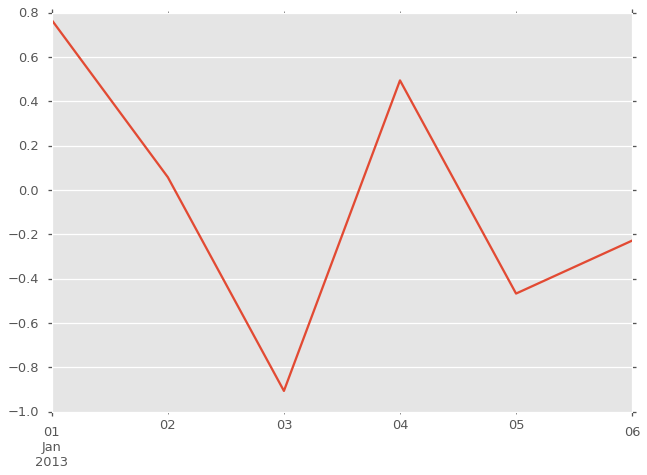

In [120]:
df['A'].plot()

In [9]:
# Create a column from the index values
df.reset_index(level=0, inplace=True)
df.head(10)

,Date,AMZN,FB,GOOGL,HPQ,LNKD,MSFT,YHOO
0,2014-01-02,397.970001,54.709999,557.117134,26.726783,207.639999,35.448341,39.590000
1,2014-01-03,396.440002,54.560001,553.053047,27.383841,207.419998,35.209856,40.119999
2,2014-01-06,393.630005,57.200001,559.219245,27.335529,203.919998,34.465786,39.930000
3,2014-01-07,398.029999,57.919998,570.000007,27.229239,209.639999,34.732887,40.919998
4,2014-01-08,401.920013,58.230000,571.186226,26.523869,209.059998,34.112826,41.020000
5,2014-01-09,401.010010,57.220001,565.685676,26.678471,215.250000,33.893420,40.919998
6,2014-01-10,397.660004,57.939999,565.655647,26.765435,218.750000,34.379931,41.230000
7,2014-01-13,390.980011,55.910000,562.052070,27.171264,213.539993,33.368755,39.990002
8,2014-01-14,397.540009,57.740002,575.275276,27.876635,216.220001,34.131905,41.139999
9,2014-01-15,395.869995,57.599998,574.884895,27.866972,216.000000,35.066764,41.070000


### This is what data looks like in 'long' format:

In [10]:
df_long = pd.melt(df, id_vars=['Date']).dropna()
df_long.head()

,Date,variable,value
0,2014-01-02,AMZN,397.970001
1,2014-01-03,AMZN,396.440002
2,2014-01-06,AMZN,393.630005
3,2014-01-07,AMZN,398.029999
4,2014-01-08,AMZN,401.920013


In [11]:
df_long.tail()

,Date,variable,value
1605,2014-11-21,YHOO,51.040001
1606,2014-11-24,YHOO,51.830002
1607,2014-11-25,YHOO,51.720001
1608,2014-11-26,YHOO,51.930000
1609,2014-11-28,YHOO,51.740002


In [12]:
df_long.rename(columns={'variable': 'Stock', 'value':'Price'},inplace=True)
df_long.head(10)

,Date,Stock,Price
0,2014-01-02,AMZN,397.970001
1,2014-01-03,AMZN,396.440002
2,2014-01-06,AMZN,393.630005
3,2014-01-07,AMZN,398.029999
4,2014-01-08,AMZN,401.920013
5,2014-01-09,AMZN,401.010010
6,2014-01-10,AMZN,397.660004
7,2014-01-13,AMZN,390.980011
8,2014-01-14,AMZN,397.540009
9,2014-01-15,AMZN,395.869995


#### Now we can plot the stock prices.  Since the data is in long format, we can take advantage of ggplot's color= parameter, which will magically make line charts with different colors for each stock.  If the data was in wide format, you would have had to manually specify all the different stocks to plot or use a loop construct.

[[back to top](#top)] [[back to section](#melt)]

In [116]:
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.style.use('seaborn-talk')

stock_plot =plt.plot(df_long, aes(x='Date', y='Price', color='Stock')) + \
        geom_line() + \
        ylab('Price (US$)') + \
        ggtitle('Auto Stocks: Adj Close') + \
        scale_x_date(labels='%b %d %y',breaks=date_breaks('3 months') )
    
# Have to use MATPLOTLIB api to rotate x tick labels.  Hopefully some day, ggplot will implement a rotation option.
fig = stock_plot.draw()
ax = fig.gca()
labels = ax.get_xticklabels() 
for label in labels: 
    label.set_rotation(270)
plt.show()

NameError: name 'df_long' is not defined

#### [ggplot](http://blog.yhathq.com/posts/ggplot-for-python.html) is AWESOME!

<a id='pivot'>

## How to convert data in long format to wide format using pd.pivot()

[[back to top](#top)]

In [21]:
pivoted = df_long.pivot(index='Date', columns='Stock', values='Price')
pivoted.head()

Stock,AMZN,FB,GOOGL,HPQ,LNKD,MSFT,YHOO
Date,,,,,,,
2014-01-02,397.97,54.71,557.12,27.17,207.64,35.91,39.59
2014-01-03,396.44,54.56,553.05,27.84,207.42,35.67,40.12
2014-01-06,393.63,57.20,559.22,27.79,203.92,34.92,39.93
2014-01-07,398.03,57.92,570.00,27.68,209.64,35.19,40.92
2014-01-08,401.92,58.23,571.19,26.96,209.06,34.56,41.02


<a id='category'>

## Using category data type to control sort order

[[back to top](#top)]

In [27]:
import pandas as pd
data = pd.DataFrame({'medal': ['bronze', 'silver', 'silver', 'gold','bronze', 'bronze', 'gold', 'gold','gold'],
                 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,medal,ounces
0,bronze,4.0
1,silver,3.0
2,silver,12.0
3,gold,6.0
4,bronze,7.5
5,bronze,8.0
6,gold,3.0
7,gold,5.0
8,gold,6.0


In [28]:
data["medal"] = data["medal"].astype("category")
data.dtypes

medal     category
ounces     float64
dtype: object

In [29]:
data.sort_values(by=["medal"])

,medal,ounces
0,bronze,4.0
4,bronze,7.5
5,bronze,8.0
3,gold,6.0
6,gold,3.0
7,gold,5.0
8,gold,6.0
1,silver,3.0
2,silver,12.0


### Now define the order of the cetgorical data using set_categories()

[[back to top](#top)] [[back to section](#category)]

In [30]:
data["medal"].cat.set_categories([ "gold","silver","bronze"],inplace=True)

In [31]:
data.sort_values(by=["medal"])

,medal,ounces
3,gold,6.0
6,gold,3.0
7,gold,5.0
8,gold,6.0
1,silver,3.0
2,silver,12.0
0,bronze,4.0
4,bronze,7.5
5,bronze,8.0


<a id='merge'>

### Merging 2 data frames using merge()

[[back to top](#top)]

In [72]:
import pandas as pd
left = pd.DataFrame({'group': ['a', 'a', 'a', 'b','b', 'b', 'c', 'c','c'],
                 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
left

,group,ounces
0,a,4.0
1,a,3.0
2,a,12.0
3,b,6.0
4,b,7.5
5,b,8.0
6,c,3.0
7,c,5.0
8,c,6.0


In [76]:
right = pd.DataFrame({'label': ['a','b','c'],
                     'value': ['alpha','beta','charlie']})
right

,label,value
0,a,alpha
1,b,beta
2,c,charlie


#### By default, merge() does an inner join, but you can specify 'left', 'right', or 'outer' joins

In [85]:
inner_joined = pd.merge(left, right, how='inner', left_on='group', right_on='label')
inner_joined

,group,ounces,label,value
0,a,4.0,a,alpha
1,a,3.0,a,alpha
2,a,12.0,a,alpha
3,b,6.0,b,beta
4,b,7.5,b,beta
5,b,8.0,b,beta
6,c,3.0,c,charlie
7,c,5.0,c,charlie
8,c,6.0,c,charlie


**NOTE:** To merge 2 Series, you have to use [pd.concat()](http://stackoverflow.com/questions/18062135/combining-two-series-into-a-dataframe-in-pandas) instead

#### For more on merge, join, and concatenate, see the official [docs](http://pandas.pydata.org/pandas-docs/stable/merging.html)

<a id="missing">

### Finding rows of a data frame containing missing data

[[back to top](#top)]

In [1]:
import numpy as np
import pandas as pd
df = pd.DataFrame([range(3), [0, np.NaN, 0], [0, 0, np.NaN], range(3), range(3)])
df

,0,1,2
0,0,1,2
1,0,NaN,0
2,0,0,NaN
3,0,1,2
4,0,1,2


In [2]:
df.isnull().any(axis=1)

0    False
1     True
2     True
3    False
4    False
dtype: bool

In [3]:
df[df.isnull().any(axis=1)]

,0,1,2
1,0,NaN,0
2,0,0,NaN


<a id='convert_type'>

### Converting a data type of a column in a data frame

[[back to top](#top)]

In [10]:
import pandas as pd

a = [['a', '1.2', '4.2'], ['b', '70', '0.03'], ['x', '5', '0']]
df = pd.DataFrame(a, columns=['one', 'two', 'three'])
df

,one,two,three
0,a,1.2,4.2
1,b,70,0.03
2,x,5,0


In [13]:
df.dtypes

one      object
two      object
three    object
dtype: object

In [14]:
df[['two', 'three']] = df[['two', 'three']].astype(float)

In [15]:
df.dtypes

one       object
two      float64
three    float64
dtype: object

<a id="matplotlib">

### Plotting data frames using MATPLOTLIB version 1.5 and up

[[back to top](#top)]

Starting with version 1.5, you can now pass a "data" parameter inside MATPLOTLIB's plot() function

Prior to version 1.5:

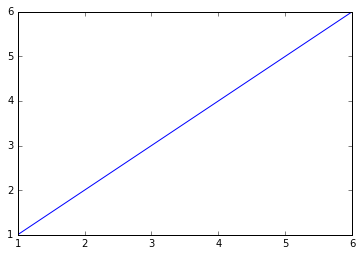

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({"var1":[1,2,3,4,5,6], "var2":[1,2,3,4,5,6]})
plt.plot(df["var1"], df["var2"])
plt.show()

With version 1.5+

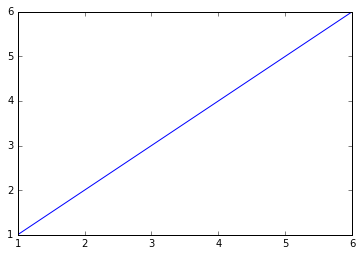

In [4]:
plt.plot("var1", "var2", data=df)
plt.show()

<a id="subplots">

### Plotting data frame directly and creating sub-plots or grouping using column=, by= parameters

[[back to top]](#top)

**When making histograms, pandas knows to make sub-plots based on the by=column option:**

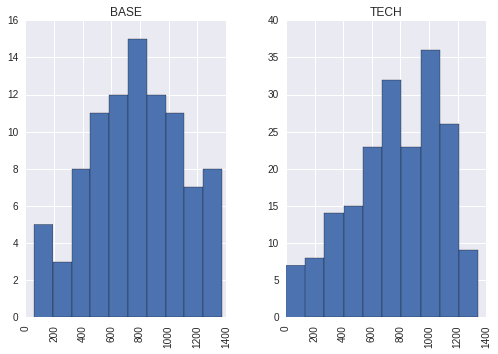

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_excel('/home/pybokeh/Downloads/temp.xlsx', sheetname='Claims')
df.hist(column='DTF', by='GRADE_SHORT')
plt.show()

**For box plots, instead of making sub-plots, pandas intelligently splits the data using the by= parameter"**:

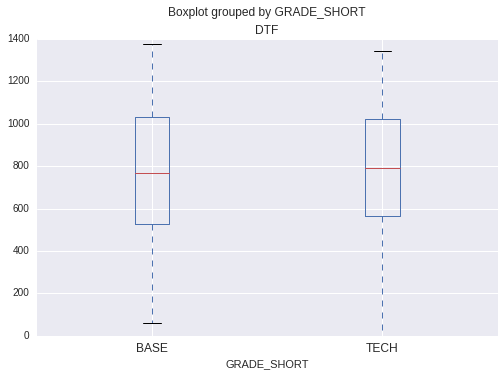

In [2]:
df.boxplot(column='DTF', by='GRADE_SHORT')
plt.show()

<a id="bokeh">

### Creating a Bokeh Chart from a Data Frame - see the [docs](http://bokeh.pydata.org/en/latest/docs/reference/charts.html) for more examples

conda install bokeh or pip instal bokeh

[[back to top](#top)]

In [1]:
from bokeh.sampledata.autompg import autompg as df
from bokeh.charts import BoxPlot, output_notebook, show, hplot

box = BoxPlot(df, values='mpg', label='cyl', title="Auto MPG Box Plot", plot_width=400, plot_height=400)
box2 = BoxPlot(df, values='mpg', label='cyl', color='cyl',
               title="MPG Box Plot by Cylinder Count", plot_width=400, plot_height=400)

output_notebook()
show(hplot(box, box2))

Loading BokehJS ...

<a id="plotly">

### Making plotly charts directly from data frame.  See plotly [documentation](https://plot.ly/python/offline/) for more details.

Need to first install plotly and cufflinks: pip install plotly and pip install cufflinks

[[back to top](#top)]

In [2]:
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import numpy as np
import cufflinks as cf
init_notebook_mode()

df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])

iplot(df.iplot(asFigure=True, kind='box', title='Plotly Pandas', dimensions=(800,500)))

<a id="chaining">

### Method Chaining

[[back to top](#top)]

With method chaining, it eliminates the need for making intermediary variables.  You can process your data frame in a series of method calls when you enclose your data frame with parenthesis. Here's a very contrived example:

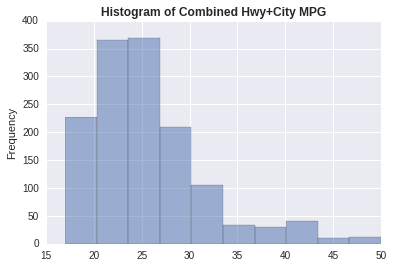

In [6]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = (pd.read_csv('/home/pybokeh/temp/vehicles.csv',
                 usecols=['year', 'make', 'model', 'comb08', 'fuelType', 'fuelType1', 
                          'fuelType2', 'atvType', 'cylinders', 'VClass'])
      .rename(columns={'comb08':'combmpg'})
      .query("make in('Honda','Acura','Toyota','Lexus') \
              & fuelType1 in('Regular Gasoline','Premium Gasoline','Midgrade Gasoline') \
              & cylinders in(4, 6) \
              & VClass in('Compact Cars','Subcompact Cars','Midsize Cars','Large Cars','Sport Utility','Minivan') \
              & ~(fuelType2 in('E85','Electricity','Natural Gas','Propane'))")
      ['combmpg'].plot.hist(alpha=0.5, label='Honda Motor Co')
     )
plt.title("Histogram of Combined Hwy+City MPG", weight="bold")
plt.show()

**Also check out [pipe() method](http://pandas.pydata.org/pandas-docs/stable/basics.html#tablewise-function-application).**

<a id="rpy2">

### Sending Pandas data frame to R using rpy2 IPython notebook extension

[[back to top](#top)]

Assuming you have [R](http://www.r-project.org/) and [rpy2](http://rpy.sourceforge.net/rpy2/doc-2.4/html/interactive.html#module-rpy2.ipython.rmagic) installed, we can send a Pandas data frame to R using the rpy2 IPython notebook extension to take advantage of R's various statistical and graphing packages.

#### Simple example where I will pull Yen currency exchange rate data from the web and graph it using R's ggplot2 library:

In [1]:
# load the rpy2 extension
%load_ext rpy2.ipython

#### Let's fetch the exchange rate data:

In [2]:
import pandas as pd

pandas_df = pd.read_csv('http://research.stlouisfed.org/fred2/data/EXJPUS.txt', sep='  ', skiprows=28, engine='python',
                 parse_dates=[0], header=None, names=['Month','Value'])

#### Sanity check on the data:

In [3]:
pandas_df.dtypes

Month    datetime64[ns]
Value           float64
dtype: object

In [4]:
pandas_df.tail()

,Month,Value
528,2015-01-01,118.2500
529,2015-02-01,118.7600
530,2015-03-01,120.3945
531,2015-04-01,119.5095
532,2015-05-01,119.7064


#### We'll use this one-liner %R magic command to send the Pandas data frame to R as input using the "-i" flag.  See [here](http://rpy.sourceforge.net/rpy2/doc-2.4/html/interactive.html#module-rpy2.ipython.rmagic) for other flags.

In [7]:
%R -i pandas_df

#### Alternatively, you can use pandas built-in [facility](http://pandas.pydata.org/pandas-docs/stable/r_interface.html) to do this:

In [5]:
from rpy2.robjects import pandas2ri
pandas2ri.activate()

#### Next, we'll use %%R magic command which will make the entire code cell R executable:

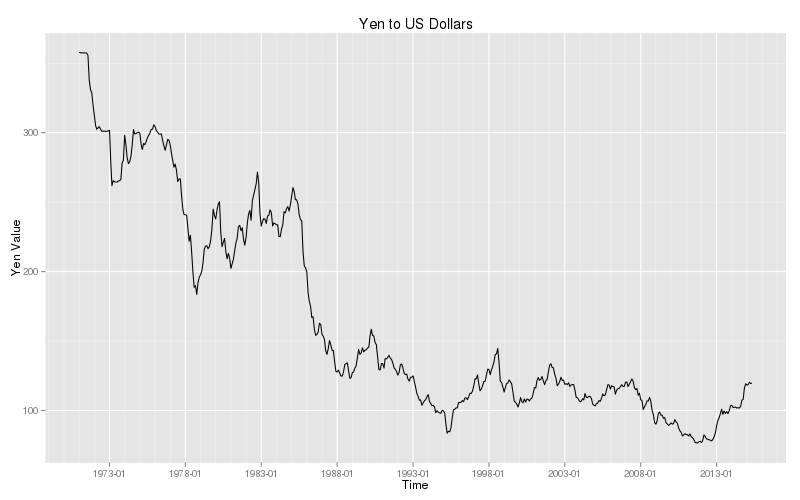

In [8]:
%%R -w 800 -h 500 -u px # instead of px, you can also choose 'in', 'cm', or 'mm'
df = as.data.frame(pandas_df)  # ensure data frame that was passed in from Python will be R's data frame type
library(ggplot2)        # plotting library
library(scales)         # enables us to change the x label time scale

p = ggplot(pandas_df, aes(pandas_df$Month, pandas_df$Value))
p = p + 
    geom_line() +
    scale_x_datetime(labels=date_format("%Y-%m"), breaks="5 years", minor_breaks="1 year") +
    ggtitle("Yen to US Dollars") +
    xlab("Time") +
    ylab("Yen Value")
print(p)

[[back to top](#top)]